In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('datingTestSet2.txt',sep='\t',header=None)

In [4]:
dataset.head

<bound method NDFrame.head of          0          1         2  3
0    40920   8.326976  0.953952  3
1    14488   7.153469  1.673904  2
2    26052   1.441871  0.805124  1
3    75136  13.147394  0.428964  1
4    38344   1.669788  0.134296  1
5    72993  10.141740  1.032955  1
6    35948   6.830792  1.213192  3
7    42666  13.276369  0.543880  3
8    67497   8.631577  0.749278  1
9    35483  12.273169  1.508053  3
10   50242   3.723498  0.831917  1
11   63275   8.385879  1.669485  1
12    5569   4.875435  0.728658  2
13   51052   4.680098  0.625224  1
14   77372  15.299570  0.331351  1
15   43673   1.889461  0.191283  1
16   61364   7.516754  1.269164  1
17   69673  14.239195  0.261333  1
18   15669   0.000000  1.250185  2
19   28488  10.528555  1.304844  3
20    6487   3.540265  0.822483  2
21   37708   2.991551  0.833920  1
22   22620   5.297865  0.638306  2
23   28782   6.593803  0.187108  3
24   19739   2.816760  1.686209  2
25   36788  12.458258  0.649617  3
26    5741   0.000000  1.

In [5]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [6]:
X

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

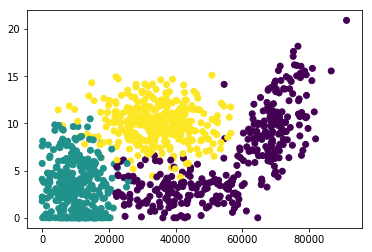

In [16]:
#plot dataset
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1],c= Y)
plt.show()

In [17]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier_obj=KNeighborsClassifier(n_neighbors=5)
classifier=classifier_obj.fit(X_train,Y_train)

In [69]:
Y_pre=classifier.predict(X_test)
Y_pre

array([2, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1, 3,
       1, 3, 2, 1, 3, 3, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1,
       3, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 1, 2, 3, 2, 1,
       2, 3, 2, 2, 2, 3, 1, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 3, 1, 1, 3, 2], dtype=int64)

In [70]:
def error_count(Y_true,Y_pre):
    count=0
    for i in range(len(Y_true)):
        if Y_true[i]!=Y_pre[i]:
            count+=1
    print(count)
error_count(Y_test,Y_pre)

8


In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.transform(X_test)

In [95]:
classifier_obj2=KNeighborsClassifier(n_neighbors=5)
classifier2=classifier_obj2.fit(X_train2,Y_train)

In [96]:
Y_pre2=classifier2.predict(X_test2)

In [97]:
error_count(Y_test,Y_pre2)

8


In [90]:
len(Y_pre)

100

In [91]:
from sklearn.linear_model import LogisticRegression
regress_obj=LogisticRegression()
regress=regress_obj.fit(X_train,Y_train)

In [98]:
Y_pre=regress.predict(X_test)
error_count(Y_test,Y_pre)

9


In [99]:
Y_pre

array([2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3,
       1, 3, 2, 1, 3, 3, 2, 1, 2, 3, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1,
       3, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 2, 3, 2, 1,
       2, 3, 2, 2, 2, 3, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 3, 1, 1, 3, 2], dtype=int64)

In [100]:
regress2=regress_obj.fit(X_train2,Y_train)
Y_pre2=regress2.predict(X_test2)
error_count(Y_test,Y_pre2)

9
